<a href="https://colab.research.google.com/github/VeeXD/Binary_Cancer_Class/blob/main/Cancer_Classi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [89]:
df = pd.read_csv('/content/drive/MyDrive/Cancer_Data.csv')
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [90]:
df.isna().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


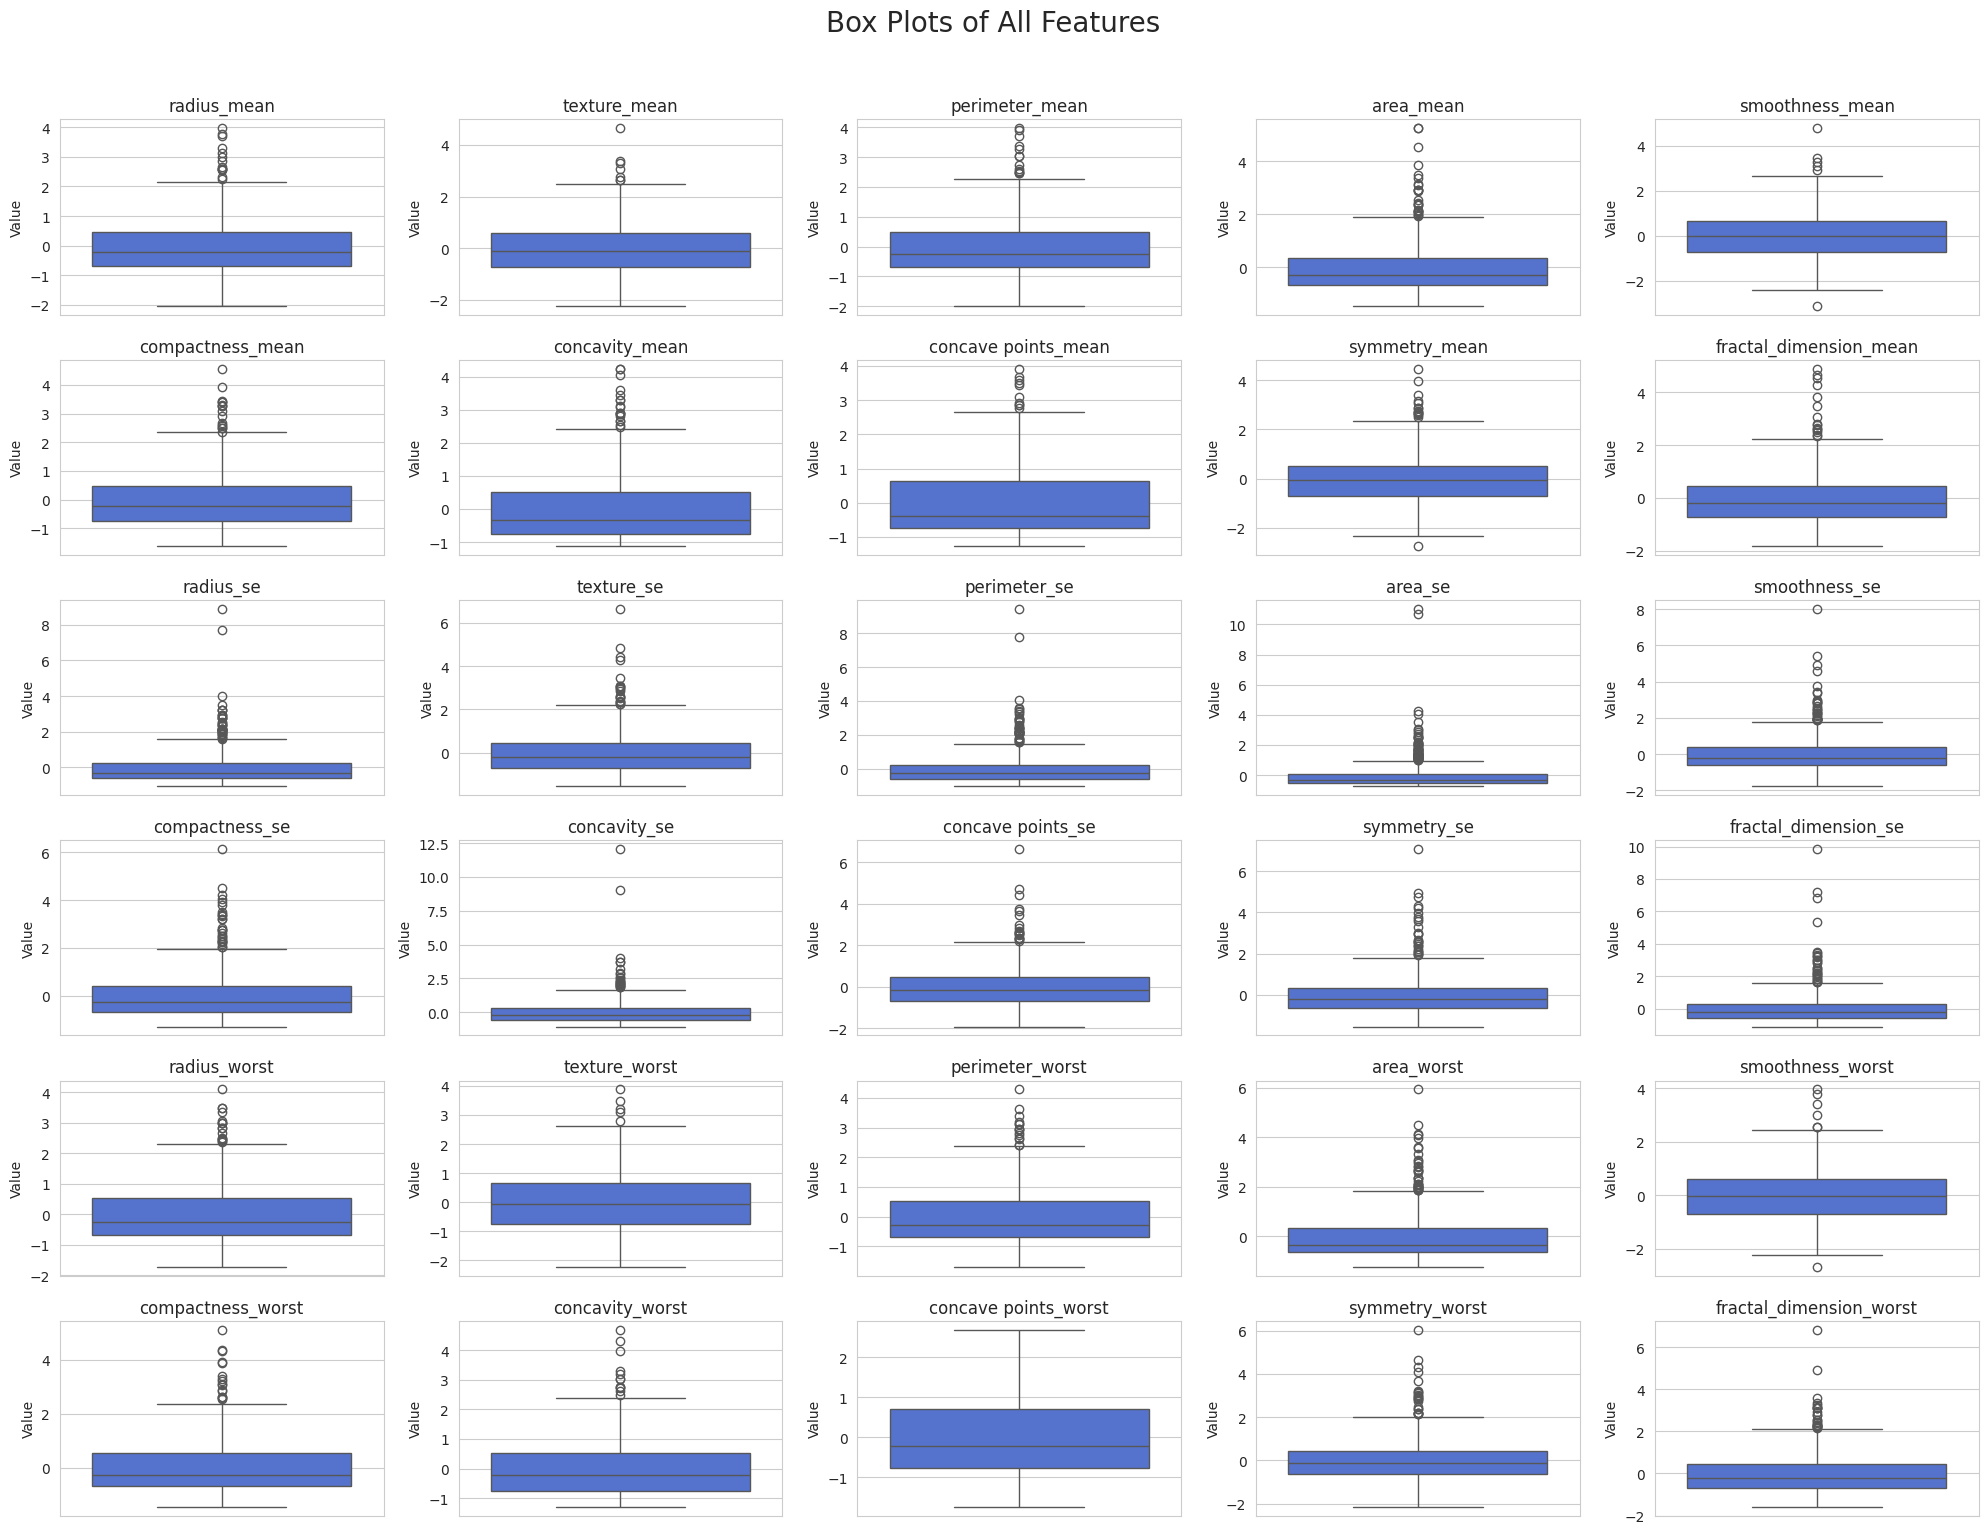

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))  # 6 rows, 5 columns for 30 features
fig.suptitle("Box Plots of All Features", fontsize=20, y=1.02)

axes = axes.flatten()

# Plot each feature separately
for i, col in enumerate(df.columns[:30]):
    sns.boxplot(y=df[col], ax=axes[i], color="royalblue")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value")


plt.tight_layout()
plt.show()


In [92]:

Y_df = df['diagnosis']
df = df.drop(['Unnamed: 32','id'],axis=1)
Y_df.shape

y_df = Y_df.copy()
y_df.head(25)



,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_df = le.fit_transform(Y_df)
Y_df = pd.DataFrame(Y_df, columns = ['diagnosis'])
Y_df




,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


<ipython-input-94-c2ac22aa79ba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_df = y_df.replace({'M': 1, 'B': -1})


([<matplotlib.axis.XTick at 0x7ca147432850>,
 [Text(0, 0, 'Benign (-1)'), Text(1, 0, 'Malignant (1)')])

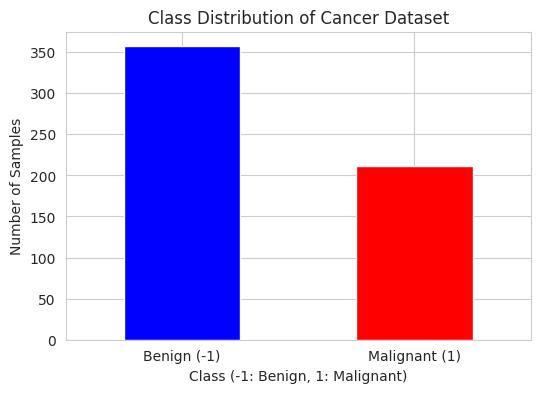

In [94]:
y_df = y_df.replace({'M': 1, 'B': -1})
# Converting back to DataFrame
y_df = pd.DataFrame(y_df, columns=['diagnosis'])
y_df

# Plotting  class imbalance.
plt.figure(figsize=(6, 4))
y_df.value_counts().plot(kind='bar', color=['blue', 'red'])

plt.xlabel("Class (-1: Benign, 1: Malignant)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Cancer Dataset")
plt.xticks(ticks=[0, 1], labels=["Benign (-1)", "Malignant (1)"], rotation=0)
# plt.show()

Label encoding
M --> 1
B --> 0
,Standerdizing the features


In [95]:
X_df = df.drop(['diagnosis'],axis=1)
X_df.shape
mean = np.mean(X_df, axis=0)
std = np.std(X_df, axis=0)

X_mean = X_df.mean()
X_std = X_df.std()


X_standardized = (X_df - X_mean) / X_std
X_standardized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [96]:
df = pd.DataFrame(X_standardized, columns = X_df.columns)
#df = df.drop(['diagnosis'])
df.describe()
#print("Mean after standardization:\n", X_standardized.mean())
#print("Standard deviation after standardization:\n", X_standardized.std())


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.123881e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,2.497514e-17,-4.995028e-17,1.748260e-16,4.838933e-16,...,-8.241796e-16,0.000000,-3.496520e-16,1.248757e-17,-2.372638e-16,-3.246768e-16,8.741299e-17,2.247763e-16,2.747265e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-0.747971,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-0.043477,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,0.657762,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


# Support Vector Machine




In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix


In [98]:
X_sv_train, X_sv_test, y_sv_train, y_sv_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=Y_df)

In [99]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', C=4, gamma= 'scale', class_weight = 'balanced')
classifier.fit(X_sv_train, y_sv_train)

y_sv_pred = classifier.predict(X_sv_test)
accuracy_sv = accuracy_score(y_sv_test, y_sv_pred)
print(f"Accuracy: {accuracy_sv * 100}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 93.85964912280701


In [100]:

# Predicting on training data
y_sv_train_pred = classifier.predict(X_sv_train)

# Calculating training accuracy
train_accuracy = accuracy_score(y_sv_train, y_sv_train_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 97.36%


              precision    recall  f1-score   support

          -1       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<Axes: >

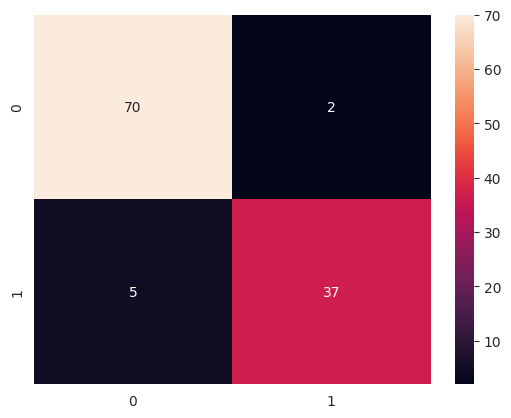

In [101]:
# Evaluating

cm_sv = confusion_matrix(y_sv_test, y_sv_pred)
print(classification_report(y_sv_test, y_sv_pred))
sns.heatmap(cm_sv,annot=True,fmt='d')

In [102]:
y_sv_pred # because, scikit-learn internally converts to [0,1] if it notices any kind of binary classes.

array([-1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1])

# Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression

# train test split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(df, Y_df, test_size=0.2, random_state=42, stratify=y_df)

log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')  # Using 'balanced' to handle class imbalance.
log_reg.fit(Xl_train, yl_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', solver='liblinear')

Accuracy: 97.37%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Axes: >

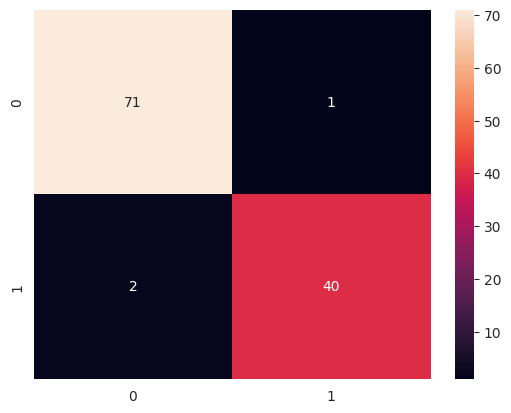

In [104]:

yl_pred = log_reg.predict(Xl_test)

# Evaluating
accuracy_l = accuracy_score(yl_test, yl_pred)
print(f"Accuracy: {accuracy_l * 100:.2f}%")

cm_lr = confusion_matrix(yl_test, yl_pred)

print(classification_report(yl_test, yl_pred))
sns.heatmap(cm_lr,annot=True,fmt='d')

# Decision Tree Classifier

In [105]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(df, Y_df, test_size=0.2, random_state=42, stratify=Y_df)

Accuracy: 92.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



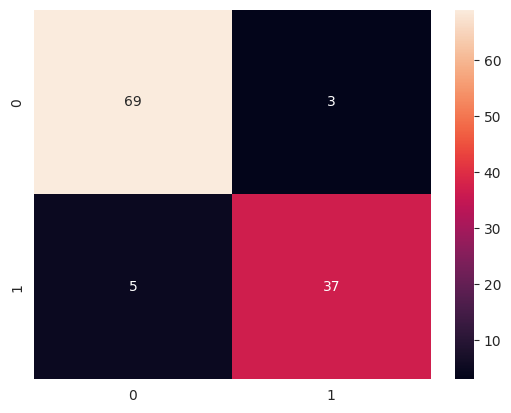

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Training
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42, class_weight='balanced')
dt_classifier.fit(X_dt_train, y_dt_train)

# predicting
y_dt_pred = dt_classifier.predict(X_dt_test)

# Evaluating
accuracy = accuracy_score(y_dt_test, y_dt_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm_dt = confusion_matrix(y_dt_test, y_dt_pred)
sns.heatmap(cm_dt,annot=True,fmt='d')

print("\nClassification Report:")
print(classification_report(y_dt_test, y_dt_pred))



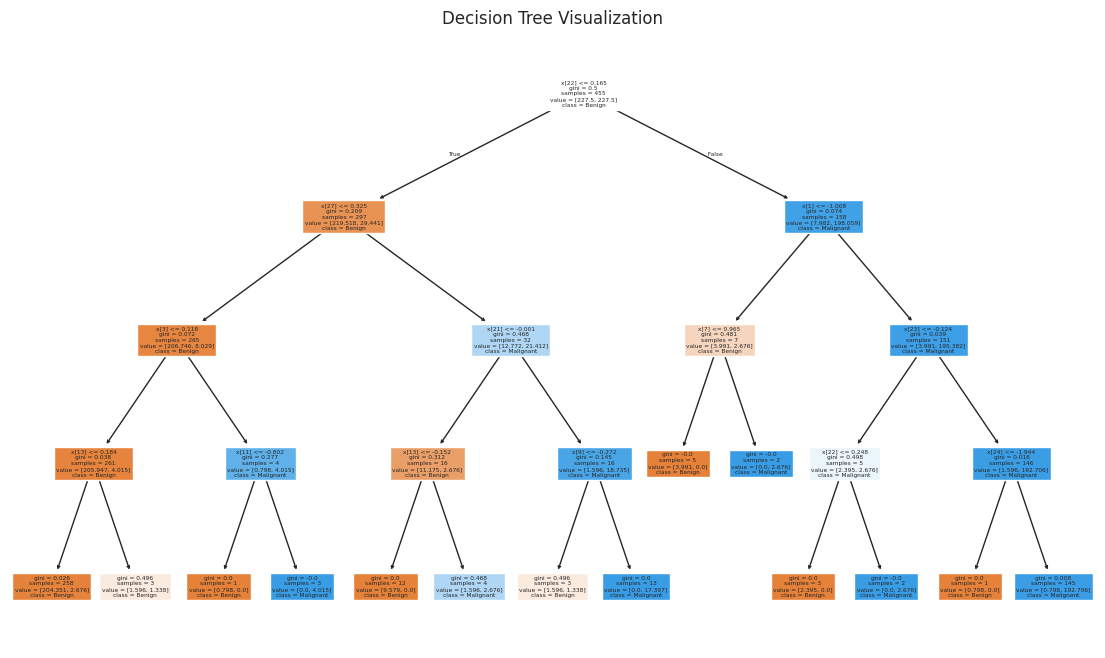

In [107]:
# Visualizing the Decision Tree
plt.figure(figsize=(14, 8))
plot_tree(dt_classifier, filled=True, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree Visualization")
plt.show()

# Naive Baye's

In [108]:
from sklearn.naive_bayes import GaussianNB

X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(df,Y_df, test_size=0.2, random_state=42)

# Training
gnb = GaussianNB()
gnb.fit(X_nb_train, y_nb_train)

# Predicting
y_nb_pred = gnb.predict(X_nb_test)

# Evaluating
print("Accuracy:", accuracy_score(y_nb_test, y_nb_pred))
print(classification_report(y_nb_test, y_nb_pred))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

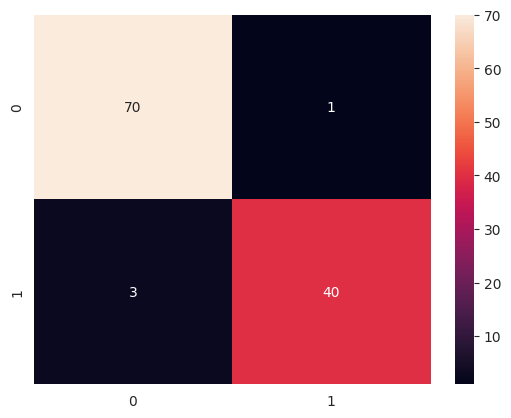

In [109]:
cm_nb = confusion_matrix(y_nb_test, y_nb_pred)
sns.heatmap(cm_nb,annot=True,fmt='d')


#**Perceptron**

In [110]:
from sklearn.linear_model import Perceptron

Xp_train, Xp_test, yp_train, yp_test = train_test_split(df, Y_df, test_size=0.2, random_state=42)

# Create and train the Perceptron model
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(Xp_train, yp_train)

# Predict on test data
yp_pred = model.predict(Xp_test)

# Evaluate the model
print("Accuracy:", accuracy_score(yp_test, yp_pred))

Accuracy: 0.9736842105263158


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

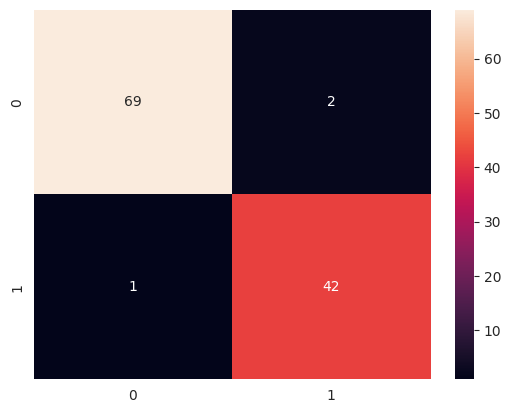

In [111]:
cm_p = confusion_matrix(yp_test, yp_pred)
sns.heatmap(cm_p,annot=True,fmt='d')